### Teleportación Cuántica

In [1]:
#Para instalar las librerías necesarias

!pip install qiskit
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   -------- ------------------------------- 1.3/6.2 MB 5.6 MB/s eta 0:00:01
   ------------------ --------------------- 2.9/6.2 MB 7.3 MB/s eta 0:00:01
   ------------------------- -------------- 3.9/6.2 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 15.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/17.8 MB ? eta -:--:--
   -- ------------------------------------- 1.3/17.8 MB 5.2 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/17.8 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 4.2/17.8 MB 7.0 MB/s eta 0:00:02
   --------- ------------------------------ 4.2/17.8 MB 7.0 MB/s eta 0:00:02
   ------------- --------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.5 MB 11.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.5 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.5 MB 7.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.5 MB 6.8 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 7.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.5 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 6.0 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------  3.1/3.2 MB 18.4 MB/s eta 0:00:01
   -----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136846 sha256=77dfb5616e1f0c309437a0e93d6e897ecf7b0d4fe3df7307fb332eb0fb1ad237
  Stored in directory: c:\users\tobia\appdata\local\pip\cache\wheels\06\3e\78\fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


Importamos las librerías de interés. QISKit es una librería de IBM para python en la cual podemos ejecutar circuitos tanto en simuladores como en computadoras cuánticas reales.

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import __version__
print(__version__)

2.0.2


In [3]:
from qiskit import *
# from qiskit import IBMQ en qiskit 1.0 no hace falta
# do pip install qiskit-ibm-runtime first
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator, QasmSimulator

In [49]:
### Save API Token, if needed

%set_env QXToken=#Copiar el token aquí

# Or save your credentials on disk.

# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='events/qc-2024-17/project-1',
#     token='6de5d478db5e5ced14129f1fe6c1a405690f788fe796d90e20270c6ddb14e2ff88cfea43a62afd2c3d821a0099e25454ab1d2928cb95d0549b18555b7bcbfab1'
# )

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='events/qc-2024-17/project-1', token='ff6d9d4d8fd0351d415becd39c3e7550f6777ede724647bf14d877fdf4ec070af849c29762944dcc228b6b04833569e80ca483a5e66d201e1a8af42e66208eb7')

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='ff6d9d4d8fd0351d415becd39c3e7550f6777ede724647bf14d877fdf4ec070af849c29762944dcc228b6b04833569e80ca483a5e66d201e1a8af42e66208eb7')


# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=#Copiar el token aquí


In [ ]:
# Para reinciar el token

QiskitRuntimeService.delete_account()
QiskitRuntimeService.save_account(channel="ibm_quantum", token=#reemplazar el token, overwrite=True)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=''
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='')

Creamos un circuito donde el primer qubit (qubit[0]) será el qubit que deseamos transmitir (Alice), el segundo qubit (qubit[1]) lo utilizaremos como auxiliar y el tercer qubit (qubit[2]) será el qubit que consideraremos como destino (Bob).

In [7]:
# Creamos un circuitos cuántico que cuente con 3 bits cuánticos (qubits) y 3 bits clásicos (registros)
circuit = QuantumCircuit(3,3)

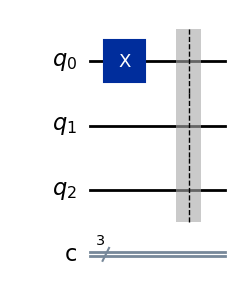

In [8]:
# Creamos un circuitos cuántico que cuente con 3 bits cuánticos (qubits) y 3 bits clásicos (registros)
circuit = QuantumCircuit(3,3)

# Aplico una compuerta Hadamard al primer qubits para crear el estado cuántico 
# que deseo transmitir, en este caso el estado |1>
circuit.x(0) 

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
circuit.draw("mpl")

# Creo el estado de Bell entre # Creo el estado de Bell entre 

# Alice y Bob 

$|\Psi\rangle = (|00\rangle+|11\rangle)/\sqrt 2 $

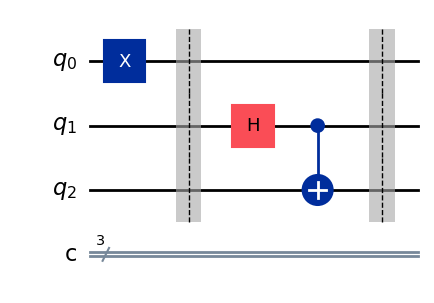

In [9]:

circuit.h(1)
circuit.cx(1,2)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
circuit.draw("mpl")

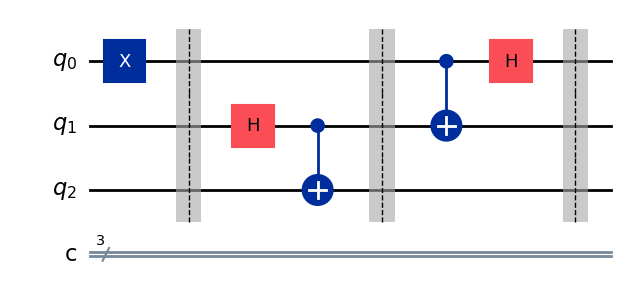

In [38]:
# Coloco las compuertas para crear el circuito de teleportación
circuit.cx(0,1)
circuit.h(0)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
circuit.draw("mpl")

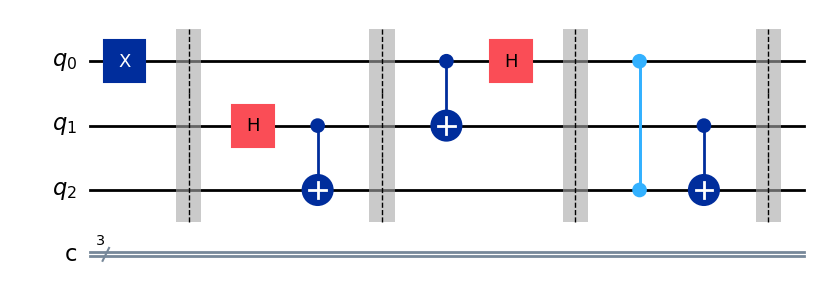

In [39]:
# Aplico la computerta X a Bob si el valor de Alice es 1 y la compuerta X a Bob  
# si el valor del qubit auxiliar es 1
circuit.cz(0, 2)
circuit.cx(1, 2)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
circuit.draw("mpl")

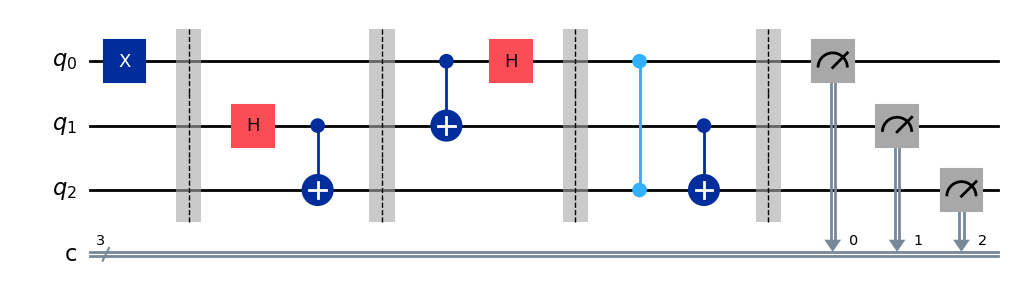

In [40]:
# Aplico las mediciones al final del circuito para los 3 qubits guardo sus 
# mediciones en los registros clásicos
circuit.measure([0, 1, 2], [0, 1, 2]) 

# Visualizamos el circuito hasta el momento
circuit.draw("mpl")

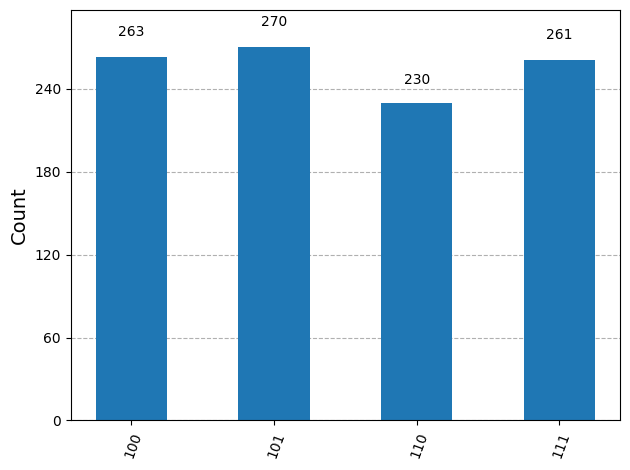

In [41]:
# Asigno el dispositivo en el cual voy a implementar mi circuito, en este caso,
# voy a implementarlo en el 'qasm_simulator' 
# Defino la ejecución y le asigno la cantidad de veces que se va a ejecutar 
# circuito (1024 en este caso)
# Tener en cuenta que en gráfico de las cuentas las muestra "al revés" |001> que es el estado CAB lo muestra 100

backend = QasmSimulator()
job = backend.run(circuit, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

In [42]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

/tmp/ipykernel_27721/3518575371.py:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(channel="ibm_quantum")


'ibm_brisbane'

In [19]:
backend

<IBMBackend('ibm_brisbane')>

In [43]:
from qiskit.transpiler import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)

In [44]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

In [45]:
job = sampler.run([(isa_circuit)])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

/home/alan/miniconda3/lib/python3.12/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


>>> Job ID: d14thke5z6q00087e7eg
>>> Job Status: QUEUED


In [46]:
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]


In [25]:
pub_result

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})

In [27]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-11 15:40:36', stop='2025-06-11 15:40:38', size=4096>)])}, 'version': 2})

In [47]:
cnts = result[0].data.c.get_counts()

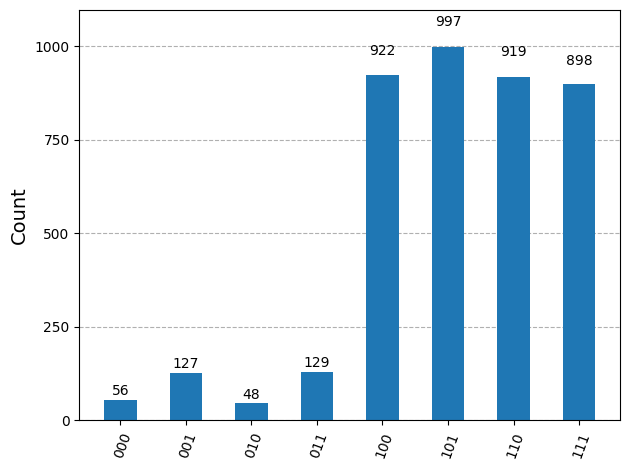

In [48]:
plot_histogram(cnts)

In [16]:
counts_qc = sim_result.get_counts()

Los resultados son interesantes y es adecuado hacer un análisis: si bien el comportamiento general de los sistemas es similar en ambos casos, podemos ver que en el caso del simulador vemos el estado del bit más significativo (mediciones del tercer qubit) es 1 en todos los casos. Esto ocurre ya que el estado que deseabamos transmitir era el |1>. Por lo tanto evidenciamos que la transmición es perfecta en el 100% de los casos.

Sin embargo, en el caso que implementamos el circuito en una computadora cuántica real vemos casos en los cuales el bit más significativo es 0, los cual quiere decir que la transferencia falla. Esto ocurre ya que estamos trabajando con una computadora cuántica real con errores que se producen debido a problemas a la hora de aislar el sistema. Estos problemas técnicos producen la decoherencia del sistema y hacen que en algunos casos el circuito falle.

Como conclusión, es interesante destacar como con pocas lineas de código podemos implementar facilmente un circuito en una computadora cuántica real y estudiar su comportamiento.

In [ ]:
# Para importar los datos En windows la ruta hay que poner  ‘r’
# file_path = r"C:\Users\User\Documents\data.txt"


In [6]:
import json
from qiskit.result import Result

f = open('/home/alan/Descargas/job-cvtvmzvbtzcg008mxyk0/job-cvtvmzvbtzcg008mxyk0-result.json')
data = json.load(f)

result = Result.from_dict(data)
counts_job=result.get_counts()
print(result.get_counts())

{'101': 987, '010': 30, '011': 48, '100': 1012, '001': 49, '000': 39, '111': 899, '110': 936}


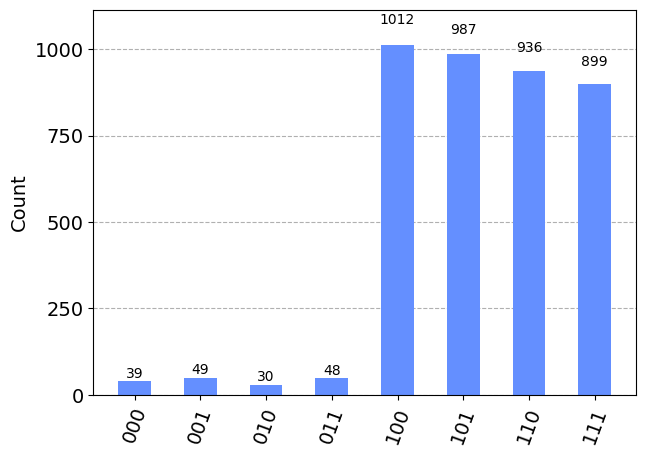

In [7]:
plot_histogram(counts_job)